In [27]:
%matplotlib inline

In [28]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

# Problem Set 5 (covers Lab 9 and 10)

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Introduction

Labs 9 and 10 were all about linear models, specifically linear and logistic regression. We learned how to build and interpret multivariate models by using domain knowledge, comparing the predicted and actual values of the coefficients and the credible intervals, and looking at residuals. We also applied transformations to make the models perform better and increase interpretability.

Using the techniques covered during Modules 9 and 10 (lectures, labs, course notes), **build, describe, and use** a linear regression model that estimates the target variable `mpg` for the accompanying auto data set. You may use other techniques you know but you must at least use the techniques described in class and call out and describe anything "extra" that you do and why.

Do **not** use any feature selection techniques or anything other than linear regression. Follow the method described in class.

The instructions say build, **describe, and use**. You must describe all aspects of your final model (all the parameters and metrics) and use it to predict one value as described in the course notes.

### Import the data

1. import the data from the txt file
2. replace the NA value with average 

In [29]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,car name
0,13.0,8,400.0,175.0,5140,12.0,71,1,pontiac safari (sw)
1,11.0,8,400.0,150.0,4997,14.0,73,1,chevrolet impala
2,12.0,8,383.0,180.0,4955,11.5,71,1,dodge monaco (sw)
3,12.0,8,429.0,198.0,4952,11.5,73,1,mercury marquis brougham
4,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom


    ### Find NA
    ### Replace NA with Average

In [30]:
data[data.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,car name
163,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl
184,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
189,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
276,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
346,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
384,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe


In [31]:
data = data.fillna(data.mean())

### mpg

1. The min of mpg is bigger than 0.
2. MPG does not follows the normal distribution, but it has positive skewness and a low kurtosis. Therefore we need to standardize mpg

In [32]:
data['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Skewness: 0.457066
Kurtosis: -0.510781


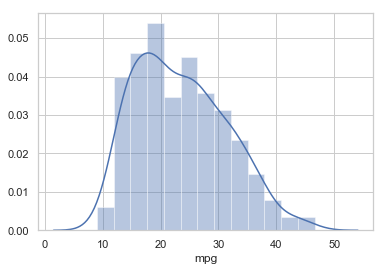

In [33]:
sns.distplot(data['mpg']);
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

### Create Dummy variables for the categorical features: origin, year

In [34]:
data = pd.concat([data, pd.get_dummies(data["modelyear"],prefix="modelyear")], axis=1)
data = pd.concat([data, pd.get_dummies(data["origin"], prefix="origin")], axis=1)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,car name,modelyear_70,...,modelyear_76,modelyear_77,modelyear_78,modelyear_79,modelyear_80,modelyear_81,modelyear_82,origin_1,origin_2,origin_3
0,13.0,8,400.0,175.0,5140,12.0,71,1,pontiac safari (sw),0,...,0,0,0,0,0,0,0,1,0,0
1,11.0,8,400.0,150.0,4997,14.0,73,1,chevrolet impala,0,...,0,0,0,0,0,0,0,1,0,0
2,12.0,8,383.0,180.0,4955,11.5,71,1,dodge monaco (sw),0,...,0,0,0,0,0,0,0,1,0,0
3,12.0,8,429.0,198.0,4952,11.5,73,1,mercury marquis brougham,0,...,0,0,0,0,0,0,0,1,0,0
4,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
data1 = data.loc[:, data.columns != 'car name'] 
corr = data1.drop("mpg", axis=1).apply(lambda x: x.corr(data1.mpg))
corr.sort_values(ascending=True)

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
horsepower     -0.771437
origin_1       -0.568192
modelyear_73   -0.274675
modelyear_70   -0.209189
modelyear_72   -0.169164
modelyear_75   -0.118796
modelyear_71   -0.079804
modelyear_76   -0.075995
modelyear_74   -0.028023
modelyear_77   -0.004919
modelyear_78    0.022079
modelyear_79    0.056689
modelyear_81    0.244922
origin_2        0.259022
modelyear_82    0.305116
modelyear_80    0.365663
acceleration    0.420289
origin_3        0.442174
origin          0.563450
modelyear       0.579267
dtype: float64

1. "weight","displacement", "cylinders" and "horsepower" have negative relationships with mpg 
2. "acceleration" has a positive relationship with mpg
3. The mpg from "origin 1" is lower than the mpg from "origin 2" and "origin 3". 
4. The model years: also related to the mpg

### Models: Method 1

In [77]:
import models

data3=data1

model = "mpg ~ weight+displacement+cylinders+horsepower+origin_1+origin_2+origin_3+modelyear+acceleration"
result1 = models.bootstrap_linear_regression(model, data=data3)
models.describe_bootstrap_lr(result1)

The R^2 is 85%, and the error is only 3.06. However, as the mpg does not follow a normal distribution, there maybe heteroscedasticity issues.  

1. origin 2 and origin 3 have a positive relationship with mpg.  
2. weight, displacement, cylinders, acceleration and horsepower have no significant relationship with mpg. This is quite a big surprise. 
3. We can remove weight, horsepower 

In [78]:
model = "mpg ~ displacement+cylinders+origin_1+origin_2+origin_3+modelyear+acceleration"
result1 = models.bootstrap_linear_regression(model, data=data3)
models.describe_bootstrap_lr(result1)

### Predict
y = -13.77 - 0.04*displacement -0.66*cylinders -6.01*origin_1 -4.4*origin_2 -3.35*origin_3 +0.72*modelyear -0.11*acceleration 

### Method 2
1. mpg has positive skewness. To overcome the skewness issue of mpg, we can standardize it

In [46]:
to_remove = ["mpg","origin","modelyear","car name"]
data_vars=data.columns.values.tolist()
to_keep = [i for i in data if i not in to_remove]
data2=data1[to_keep]
y = data1["mpg"]

print("Skewness: %f" % y.skew())
y = np.log1p(y)
print("Skewness after log+1: %f" % y.skew())

Skewness: 0.457066
Skewness after log+1: -0.109138


2. Weight, displacement, cylinders, acceleration and horsepower have no significant relationship with mpg. This maybe a problem of multicollinearity. We can try the LassoCV regularization. 

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, data2, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

model_lasso = LassoCV(alphas = [0.001]).fit(data2, y)

min(rmse_cv(model_lasso))

0.10396084945496524

In [84]:
from sklearn.metrics import r2_score
print("R^2: ",r2_score(y, model_lasso.predict(data2), multioutput='variance_weighted'))


R^2:  0.8968166947919683


The new model's R^2 is higher, and the sign of the variables make more sense. 